<a href="https://colab.research.google.com/github/NandiniMehta0603/Tensorflow/blob/main/Computer_Vision_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Convolutional neural netwroks and computer vision*

Computer vision is a practice pf writing algorithms which can discover patterns in visual data. Such as the camera of a self driving car recognizing the car in the front.

##get the data
The images we are workign with are from the Food101 dataset (101 different classes of food)
However we have modified it to use only 2 classes using the image data modification

**Note** we start with a smaller dataset so that we can experiment quickly ans figure what works (or better yet what doesn't work) before sclaing up

In [1]:
import zipfile

# ie get this file download here

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-04-17 11:03:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.250.4.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.3MB/s    in 5.7s    

2023-04-17 11:03:53 (18.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



##Inspect the data (become one with it)
Very crucial step at the beginning of any ML project is becoming one with the data.

And for a computer vision project..this usually means visualizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [5]:
import os

#walk through the pizza_steak directory and list number of files 
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
  

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [6]:
#The extra file in pizza_streak directory is ".DS_Store"
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Apr 17 11:03 .
drwxr-xr-x 1 root root 4096 Apr 17 11:03 ..
drwxr-xr-x 4 root root 4096 Apr 17 11:03 test
drwxr-xr-x 4 root root 4096 Apr 17 11:03 train


In [7]:
#Another way to find how many images are in a file
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualise the images, lets first get the class names programmatically

In [8]:
#Get the classnames programmatically
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")])) #created a list of class_names from the subdirectory
# class_names=class_names[1:]-->to remove DS Store if you have 
print(class_names)

['pizza' 'steak']


In [9]:
#Lets visualise the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class): #in string format
  #set up the target directory
  target_folder=target_dir+target_class

  #get a random image path
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)

  #read in the image and plot it using matplotlib
  img=mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: { img.shape}")#show the shape of the image

  return img


['93961.jpg']
Image shape: (512, 384, 3)


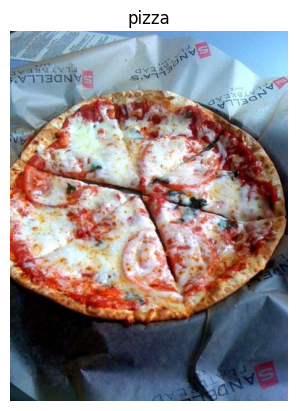

In [10]:
#view a random image from the training dataset
img=view_random_image(target_dir="pizza_steak/train/",
                      target_class="pizza")


In [11]:
# img #represented as a tensor

import tensorflow as tf
tf.constant(img) #so here we are converting our image as tensor to work as a feasible input

#the images we have imported and plotted are actually giant arrays/tensors of different pixel values 


<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[ 22,  26,  63],
        [ 19,  25,  61],
        [ 19,  25,  61],
        ...,
        [133, 194, 249],
        [132, 193, 248],
        [133, 194, 249]],

       [[ 25,  31,  65],
        [ 32,  38,  72],
        [ 35,  44,  77],
        ...,
        [133, 196, 250],
        [133, 194, 249],
        [134, 195, 250]],

       [[ 35,  44,  75],
        [ 38,  49,  79],
        [ 46,  57,  85],
        ...,
        [134, 197, 251],
        [134, 195, 250],
        [135, 196, 251]],

       ...,

       [[ 10,  35,  31],
        [ 10,  35,  31],
        [  9,  34,  31],
        ...,
        [110, 132, 189],
        [114, 136, 194],
        [118, 140, 198]],

       [[  6,  31,  27],
        [  7,  32,  28],
        [  8,  33,  30],
        ...,
        [111, 132, 189],
        [115, 135, 194],
        [118, 138, 197]],

       [[  0,  22,  16],
        [  0,  25,  21],
        [  3,  28,  25],
        ...,
        [110, 131, 18

In [12]:
#view the image shape
img.shape #returns the width,height,color channels

(512, 384, 3)

In [13]:
#get all the pixel values between 0 and 1-->scaling/normalization
img/255

array([[[0.08627451, 0.10196078, 0.24705882],
        [0.0745098 , 0.09803922, 0.23921569],
        [0.0745098 , 0.09803922, 0.23921569],
        ...,
        [0.52156863, 0.76078431, 0.97647059],
        [0.51764706, 0.75686275, 0.97254902],
        [0.52156863, 0.76078431, 0.97647059]],

       [[0.09803922, 0.12156863, 0.25490196],
        [0.1254902 , 0.14901961, 0.28235294],
        [0.1372549 , 0.17254902, 0.30196078],
        ...,
        [0.52156863, 0.76862745, 0.98039216],
        [0.52156863, 0.76078431, 0.97647059],
        [0.5254902 , 0.76470588, 0.98039216]],

       [[0.1372549 , 0.17254902, 0.29411765],
        [0.14901961, 0.19215686, 0.30980392],
        [0.18039216, 0.22352941, 0.33333333],
        ...,
        [0.5254902 , 0.77254902, 0.98431373],
        [0.5254902 , 0.76470588, 0.98039216],
        [0.52941176, 0.76862745, 0.98431373]],

       ...,

       [[0.03921569, 0.1372549 , 0.12156863],
        [0.03921569, 0.1372549 , 0.12156863],
        [0.03529412, 0

in order to process all the images simultaneously-->tensorflow provides a good method

**Note** Many ML models including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with iamges is to scale (also referred to as normalise) their pixel values by dividing the image arrays by 255 (since 255 is the maxi pixel value)

##An end to end example
let's build a convolutional neural network to find patterns in the iamges, more specifically we need a way to:
* Load the images
* Preprocess the images
* BUild a CNN to find patterns in the images
* Compile the CNN
* Fit the CNN to our training data

In [14]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# #set the seed
# tf.random.set_seed(42)

# #preprocess data (get all of the pixel values between 0 and 1, also called as scaling/normalizing)
# train_datagen=ImageDataGenerator(rescale=1./255) 
# #generates batches of tensor image data with real time data augmentation
# valid_datagen=ImageDataGenerator(rescale=1./255)

# #setup paths to our data directories
# train_dir="/content/pizza_steak/train"
# test_dir="/content/pizza_steak/test"

# #import data from the directories and turn it into batches-->preprocess it
# train_data=train_datagen.flow_from_directory(directory=train_dir,
#                                              batch_size=32,
#                                              target_size=(224,224), #in our case, we want all our images to be reshaped to this shape-->common shape-->stores optimal amount of info about an image
#                                              class_mode="binary",
#                                              seed=42 #for reproducibility
#                                              )

# valid_data=valid_datagen.flow_from_directory(directory=test_dir,
#                                              batch_size=32,
#                                              target_size=(224,224),
#                                              class_mode="binary",
#                                              seed=42)

# #build a CNN model 
# model_1=tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(filters=10,
#                            kernel_size=3,
#                            activation="relu",
#                            input_shape=(224,224,3)),
#     tf.keras.layers.Conv2D(10,3,activation="relu"),
#     tf.keras.layers.MaxPool2D(pool_size=2,
#                               padding="valid"),
#     tf.keras.layers.Conv2D(10,3,activation="relu"),
#     tf.keras.layers.Conv2D(10,3,activation="relu"),
#     tf.keras.layers.MaxPool2D(2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(1,activation="sigmoid")
# ])

# #compile the CNN model
# model_1.compile(loss="binary_crossentropy",
#                optimizer=tf.keras.optimizers.Adam(),
#                metrics=["accuracy"])

# #fit the model
# history_1=model_1.fit(train_data,
#                       epochs=5,
#                       steps_per_epoch=len(train_data),
#                       validation_data=valid_data,
#                       validation_steps=len(valid_data))

this ETA is taking so long bec we are not using a hardware acceleration-->change it to GPU-->it runs much faster

In [15]:
# len(train_data) #1500/32 -->the reason we put all of our images into batches is so that all could be stored in the memory

##An end to end example

convolutional neural network to find patterns in the images
* Load the images
*preprocess the images
*build a CNN to find patterns in the images
* compile the CNN
* fit the CNN to the training data

Usually first epoch takes 50% of the total time to load because here the image has to loaded into memory,processed and then displayed--> so rest of the epochs are faster-->change to GPU

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#preprocess the data (get all the pixel values between 0 and 1, also called as scaled/normalised tensors)
train_datagen=ImageDataGenerator(rescale=1./255) #generates batches of tensor image data with real time data augmentation--> the data will be looped over in batches
valid_datagen=ImageDataGenerator(rescale=1./255)

#set up paths for the data directories
train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"

#import data from the directories and turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224), #we want our image to be loaded in this shape
                                             class_mode="binary", #tells that we are loading our data in binary-->2 classes
                                             seed=42 #for reproducibility
                                             )

valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

#build a cnn model
model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    # tf.keras.layers.Activations(tf.nn.relu), -->if you want to explicitly mention relu layer
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
    
])

#compile the cnn model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data), #ie 47 passes-->1 for each batch of 32 size ie 32 images per batch-->so as to store in memory
                      validation_data=valid_data,
                      validation_steps=len(valid_data))
                                

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 31s 348ms/step - loss: 0.5988 - accuracy: 0.6760 - val_loss: 0.4637 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4673 - accuracy: 0.7867 - val_loss: 0.3631 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 10s 215ms/step - loss: 0.4090 - accuracy: 0.8253 - val_loss: 0.3650 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 12s 263ms/step - loss: 0.3642 - accuracy: 0.8587 - val_loss: 0.3821 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 12s 262ms/step - loss: 0.3177 - accuracy: 0.8673 - val_loss: 0.3193 - val_accuracy: 0.8680


**Note** if the above cell is taking longer than 10 seconds per epoch, make sure to use a GPU by going to runtime->change runtime type-> hardware accelerator-> gpu (we may have to run some cells again and reload the data)

In [17]:
#get the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

##Using the same model as before

Replicating the model that was made previously to see if it works with the image data



In [18]:
train_data

In [19]:
#set random seed
tf.random.set_seed(42)

#create the model 
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)), #cause we want to tell the model that we have reshaped data to these dimensions
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 220ms/step - loss: 0.7317 - accuracy: 0.5107 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 203ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 12s 248ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 193ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


Through observation-->the model is just guessing on the data-->the model is not working on the image data

In [20]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20X more parameters than the CNN model, model_2 performs terribly

In [21]:
#set the random seed
tf.random.set_seed(42)

#create the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)), #otherwise there will be shape mismatch for the next layer
    tf.keras.layers.Dense(100,activation="relu"), #increasing the hidden units
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 200ms/step - loss: 3.6836 - accuracy: 0.6167 - val_loss: 1.5926 - val_accuracy: 0.6440
Epoch 2/5
47/47 [==============================] - 10s 206ms/step - loss: 0.8908 - accuracy: 0.7220 - val_loss: 0.4696 - val_accuracy: 0.7860
Epoch 3/5
47/47 [==============================] - 9s 203ms/step - loss: 0.6676 - accuracy: 0.7220 - val_loss: 1.2642 - val_accuracy: 0.5760
Epoch 4/5
47/47 [==============================] - 10s 206ms/step - loss: 0.7776 - accuracy: 0.7193 - val_loss: 0.4173 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.5347 - accuracy: 0.7613 - val_loss: 0.6270 - val_accuracy: 0.6820


Here the accuracy has increased from 50% to 70%-->it better than guessing

In [22]:
#Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


15 million parameters-->500 times more params than the cnn model...deep learning models are very versatile-->generally with CV we use CNNs

**Note** trainable params are the patterns a model can learn from the data. Intuitively the more is better, but in this case the difference here is two different styles of models we are using. Where a series of dense layers has a number of different learnable params connected to each other and hence a higher number of possible learnable patterns, a **convulational neural network** seeks a sort and learn the most **important patterns in an image**. So even though these are less learnable params in the CNN, these are often more helpful in deciphering between different features in an image

##Binary Classification

1.become one with the data(visualise)
2. preprocess the data (prepared it for the model,main step here was scaling/normalising)
3. created a model (start with the baseline)
4. fit the model
6. adjust different params ad improve the model( try to beat the baselines)
7. repeat until satisfies(experiment)

###Become with the data

In [23]:
#Lets visualise the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class): #in string format
  #set up the target directory
  target_folder=target_dir+target_class

  #get a random image path
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)

  #read in the image and plot it using matplotlib
  img=mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: { img.shape}")#show the shape of the image

  return img


['2032669.jpg']
Image shape: (289, 512, 3)
['3614525.jpg']
Image shape: (512, 512, 3)


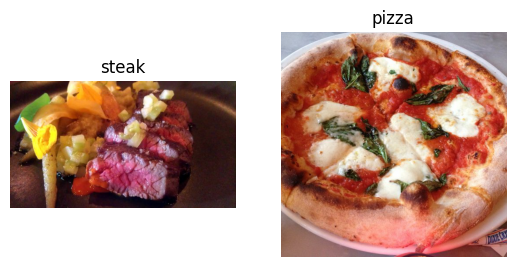

In [24]:
#visualise the data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

plt.figure()
plt.subplot(1,2,1)
# steak_img=view_random_image("pizza_steak/train/","steak")
steak_img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

###Preprocess the data-->prepare the data for the model

In [25]:
#define the directory dataset paths
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"


Next steps is to turn our data into **batches**
A batch is a small subset of data that model looks at while training rather than looking at all the images at one time

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of the preprocessor (GPU)
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well

32 is preferable usually 

In [26]:
!nvidia-smi

Mon Apr 17 11:07:26 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P0    28W /  70W |   2911MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [27]:
#create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)


Generates batches of tensor image data with real-time data augmentation



As rightly pointed out by you the rescale=1./255 will convert the pixels in range [0,255] to range [0,1]. This process is also called Normalizing the input. Scaling every images to the same range [0,1] will make images contributes more evenly to the total loss.

In [28]:
#load in the image data from directories and turn them into batches
train_data=train_datagen.flow_from_directory(directory=train_dir, #target director of iamges
                                             target_size=(224,224), #target size of images (height,width)
                                             class_mode="binary", #categorical/binary data-->type of data
                                             batch_size=32) #size of minibatches to load our data into

test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           class_mode="binary",
                                           batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [29]:
#get a sample of a train data batch
images, labels=train_data.next() #get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [30]:
#how many batches are there
len(train_data)

47

In [31]:
1500/32

46.875

In [32]:
#get the first 2 images
#first 2 images of the first batch
images[:2], images[0].shape
#we can see that the pixel values have been scaled-->normalised to (0,1)
#reshaped to 224,224,3

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [33]:
images[7].shape

(224, 224, 3)

In [34]:
#view the first match of the labels
labels #maybe 1 for pizza and 0 for steak

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

###Create the model-->CNN model

(start with the baseline model)--> A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline

In [35]:
#Make the creating of the model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential



**more about the conv 2d layer**
1. Conv2d layer takes images as input and helps produce tensor of outputs
2. Kernel: for image processing--> used for blurring, sharpening, embossing, edge detection-->image preprocessing
3. filters: no of filters that conv2d layer learns from--> also determines that conv2d layer learns from (no of filters should always be in power of 2)
4. maxpool layer: to reduce spatial dimensions of the output volume
5. kernel_size: an integer-->with height and width of conv2d window
6. strides: steps of convolution along with height and width of input volume--> Its default value is always set to (1, 1) which means that the given Conv2D filter is applied to the current location of the input volume and the given filter takes a 1-pixel step to the right and again the filter is applied to the input volume and it is performed until we reach the far right border of the volume in which we are moving our filter.
7. padding: takes **valid **-->i/p volume is not 0-->spatial dimensions are allowed to reduce or **same**-->preserve spatial dimensions of the volume such as o/p volume matches the i/p volume
8. activation: adds non linearity to the model at each step--> if not applied-->no impact on the performance of the model


**Note** in deep learning, there are almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (eg look at which current model is performing best in the field of the problem)

In [36]:
#create the model (this will be the baseline, a layer convolutional neural network)
model_4=Sequential([
    Conv2D(filters=10, #no of sliding windows going across an input (higher=more complex model)
           kernel_size=3,  #the size of the sliding window across an input
           strides=1, #the size of the step the sliding window takes across an input
           padding="valid", #if "same", the output shape is the same as input shape, if "valid", the o/p shape gets compressed
           activation="relu", 
           input_shape=(224,224,3)), #input layer (specify input shape)

    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid") #output layer (working with binary classification so only 1 output neuron)
])

1. **filter**: decides how many filters should pass over a tensor (sliding windows over an image) -->higher values lead to more complex models (just like a dense layer with more no of neurons)

2. **Kernel size**: (filter size) determines shape of the filter (sliding window) over the output --> 3(3*3),5,7 (lower values learn small features, higher values learn larger features) means lower values may learn the toppings of the pizza and the higher values may learn the edges of the pizza

3. **padding**: pads the tensor with zeros (if "same") to preserve input shape(keeps the amt of info in the input). Or leaves in the target tensor as is ("valid"-->if you want to keep compressing the info), lowering output shape.

4. **strides**: The number of steps a filter takes across an image at a time (stride=1-default, a filter moves across an image 1 pixel at a time)



64,64,3-> here 3 means 3 color channels,
kernel is a kind of sliding window that move over the image and then outputs some kind of value of(3*3 size ie as per kernel size)--> kernel covers all the pixels of the image one by one, for each filter(ie 10-->according to user input, a single image gets split into multiple filters over which the model learns) there will be a diff kernel. https://poloclub.github.io/cnn-explainer/

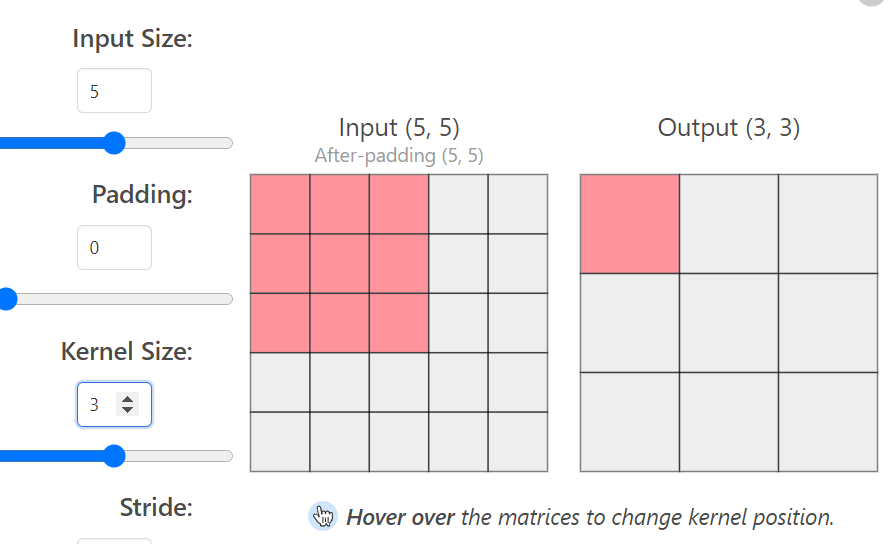
each kernel box associates an output value


padding is usually necessary when the kernel extends beyond the activation map. It conserves the data at the border of the activation maps which leads to better performance--> also preserves the input spatial size.
padding of 1 means adding a blank border outside the image--< ie we can use the info closer to the edge more efficiently
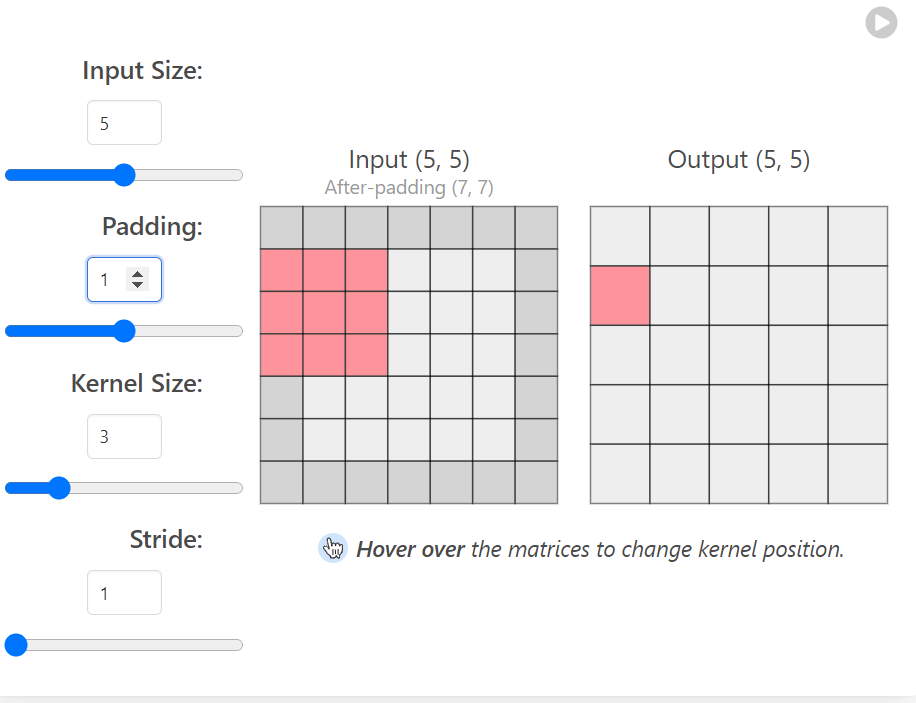


by increasing the stride, we are compressing the info on the smallest space of the output--> ie if stride=2, kernel has to move 2 steps and store that in the ouput
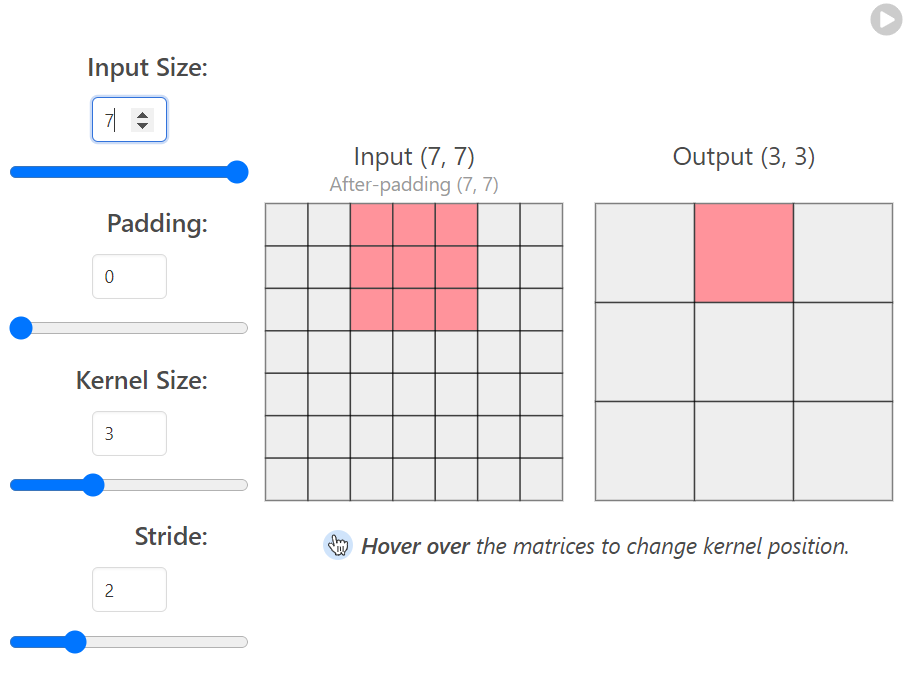

if the info is not too dense, keep the stride at lower numbers

**By the end we get an input that is compressed to an input feature**

In [37]:
#compile the model
model_4.compile(loss="binary_crossentropy",
                # optimizer=tf.keras.optimizers.Adam(),
                optimizer=Adam(),
                metrics=["accuracy"])


In [38]:
#get the summary of the model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


###Fit the model

In [39]:
#Check the length of the training data and test data generators
len(train_data), len(test_data) #batches

(47, 16)

In [40]:
#fit the model
history_4=model_4.fit(train_data, #this is the combination of labels and data
                      epochs=5,
                      steps_per_epoch=len(train_data), #total no of steps (batches of samples) before declaring the epoch finished and starting the next epoch
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 15s 272ms/step - loss: 1.0564 - accuracy: 0.6100 - val_loss: 0.5602 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 12s 266ms/step - loss: 0.4521 - accuracy: 0.7920 - val_loss: 0.5238 - val_accuracy: 0.7520
Epoch 3/5
47/47 [==============================] - 10s 218ms/step - loss: 0.3067 - accuracy: 0.8887 - val_loss: 0.4346 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 9s 201ms/step - loss: 0.1464 - accuracy: 0.9513 - val_loss: 0.4417 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 10s 218ms/step - loss: 0.0517 - accuracy: 0.9913 - val_loss: 0.5489 - val_accuracy: 0.8020


This tells that the model is actually learning something and not just guessing-->evaluate it

###Evaluate the model

<Axes: >

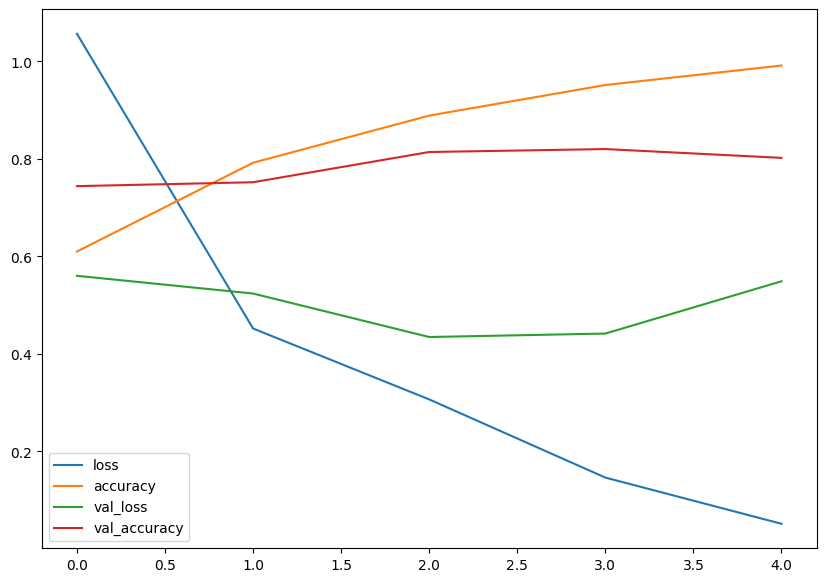

In [41]:
#plot the training curves

import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [42]:
#plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """

  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs=range(len(history.history["loss"])) #how many epochs

  #plot the loss
  plt.plot(epochs,loss,label="training loss")
  plt.plot(epochs,val_loss,label="val loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot the accuracy
  plt.plot(epochs,accuracy,label="training accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

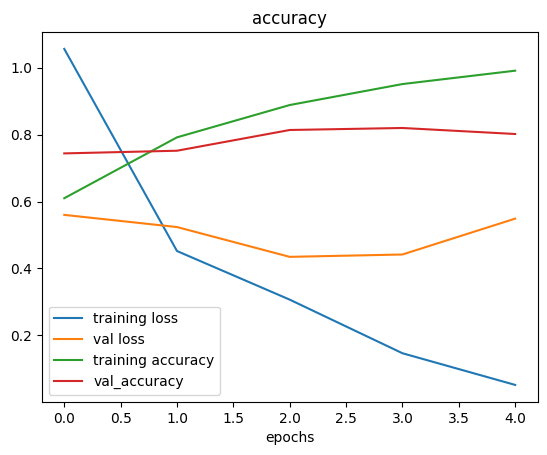

In [43]:
#check the loss and accuracy of model 4
plot_loss_curves(history_4)

**Note** when a model's validation loss starts to increase or stays constant, its likely that the model is overfitting on the training data. This means it is learning the patterns in  the training **too well** and thus the model's ability to generalise the unseen data will be diminished. 

**Generalisation** means the ability for a machine learning model to perform well on data it hasn't seen before.

###Adjust the model parameters


Fitting the machine learning model comes with 3 steps:
0. create a baseline 
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting 

Ways to induce oerfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of the flattened layer

Reduce overfitting 
* add data augmentation
* add regularization layers (such as MaxPool2D)
* Add more data...

In [44]:
#create the model (this is going to be our new baseline model)
model_5=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

Maxpooling operation for 2D spatial data


Downsamples the input representation by taking the maxi value over the window defined by pool size for each dimension along the features axis. The window is shifted by strides in each dimension. **ie** we are condesing the input to a small output. Out of all the features, we take the most important parts of those features

example:
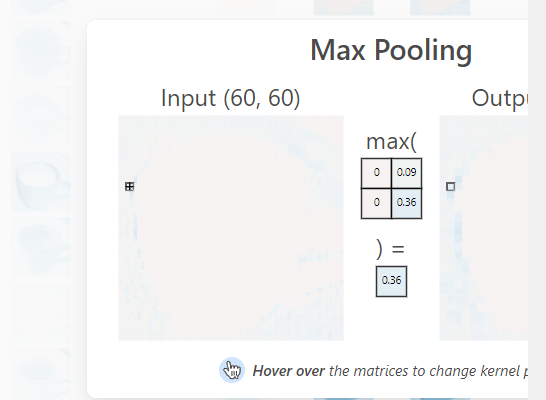
in each box, it is taking the max value of each feature

In [45]:
#compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [46]:
#fit the model
history_5=model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 214ms/step - loss: 0.6786 - accuracy: 0.5247 - val_loss: 0.6290 - val_accuracy: 0.5520
Epoch 2/5
47/47 [==============================] - 10s 212ms/step - loss: 0.4801 - accuracy: 0.7867 - val_loss: 0.3811 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4065 - accuracy: 0.8227 - val_loss: 0.3395 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.3919 - accuracy: 0.8287 - val_loss: 0.3108 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3759 - accuracy: 0.8300 - val_loss: 0.3341 - val_accuracy: 0.8780


In [47]:
#get the summary of the model with maxpooling layer
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

The max pooling parameters are half the size: 111
conv layer takes -2 params, and then maxpooling again takes half of the params

**Note** in model_4, there were 50 times more params than in model_5 but still the model_5 outperforms model_4

In [48]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


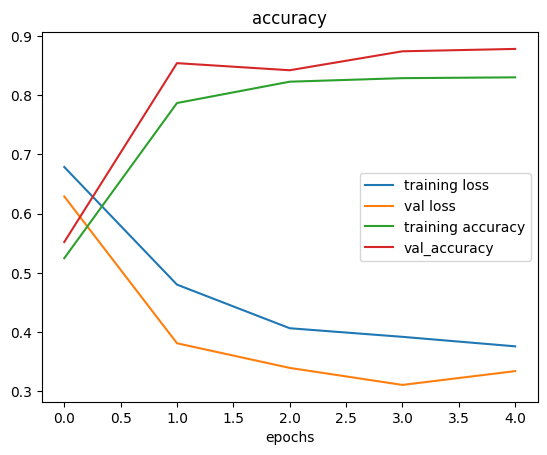

In [49]:
#plot the loss curves
plot_loss_curves(history_5)

The directions of the curves are atleast getting along and if we keep on training the model with suitable params, we will get a best result model soon. Aligning the lines is imp because it signifies that the model is generalising well on training as well as on testing.

* the max pooling layer has halved the features and removed them by taking the max-->condensed 
* thus even though params are reduced but all of them are of great value

**Note** reducing overfitting is also known as regularization

###Opening the bag of tricks and finding data augmentation

In [50]:
#create imagedataGenerator training instance with data augmentation

#generates batces of tensor image data with real time data augmentation
#the data will be looped over batches 
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2, #how much you want to rotate an image
                                           shear_range=0.2, #how much do you want to shear the image
                                           zoom_range=0.2, #zoom in randomly on the image
                                           width_shift_range=0.2, #move the image around the x axis
                                           height_shift_range=0.3, #move the image around the y axis
                                           horizontal_flip=True) #do you want to flip the image

#create image generator without data augmentation
train_datagen=ImageDataGenerator(rescale=1/255.)

#create image data generator without data augmentation for the test dataset
test_datagen=ImageDataGenerator(rescale=1/255.)

**data augmenation**

It is a process of altering the training data, leading it to have more diversity and in turn allowing the models to learn more generalizable patterns. Altering might mean adjusting the rotation of the image, flipping it, cropping it or something similar.

**Improving the model**
1. more data: gives the model a chance to learn patterns between smaples (eg if the model is performing poorly on images of pizza, show it more images of pizza)

2. data augmentation: increase the diversity of the training dataset without collecting more data (take the photos of pizza and randomly rotate them 30 degrees), Increased diversity forces a model to learn more generalisation patterns.

3. Better data: no all data samples are created equally. Removing poor samples from or adding better samples to the dataset can improve the model's performance.

4. use transfer learning: take the model's pre learned patterns from one problem and tweak them to suit your own problems. for eg: take a model trained on pictures of cars to recognise pictures of trucks.

In [51]:
#import data and augment from the training directory
print("augmented training data")
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="binary",
                                                                 shuffle=False) #for emonstartion purpose only
#create non augmented train data batches 
print("Non augmented training data")
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)

IMG_SIZE=(224,224)
# create non augmented test data batches 
print("Non augmented test data:")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=IMG_SIZE,
                                           batch_size=32,
                                           class_mode="binary")

augmented training data
Found 1500 images belonging to 2 classes.
Non augmented training data
Found 1500 images belonging to 2 classes.
Non augmented test data:
Found 500 images belonging to 2 classes.


**Note** data augmentation is usually performed on the training data. Using image data generator, built in data augmentaion parameters our images are left as they are in the directories but are modified as they are loaded into the model.


If the model performs well on augmented training data, it usually performs well on test data. 

In [52]:
#visualise augmented data batches 
images, labels=train_data.next()
augmented_images, augmented_labels=train_data_augmented.next() #note: labels are not augmented, only the data(images)


showing image random number: 24


(-0.5, 223.5, 223.5, -0.5)

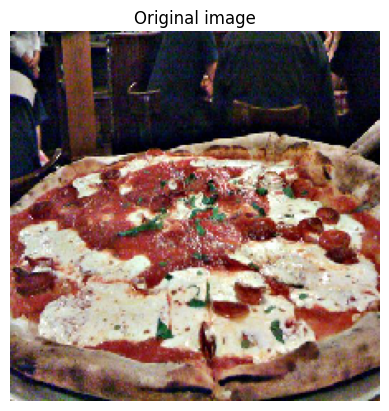

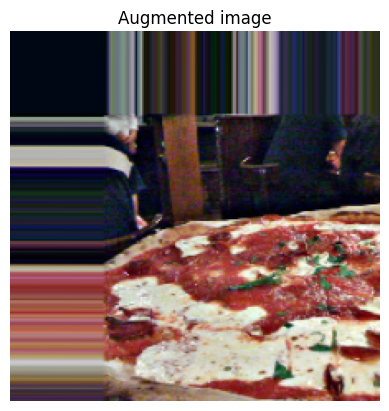

In [53]:
#show the original image and the augmented image
import random
random_number=random.randint(0,32) #our batch sizes are 32
print(f"showing image random number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

build the model and see how it learns on augmented data

In [54]:
#create the model
model_6=Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

#compile the model
model_6.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

#fit the model
history_6=model_6.fit(train_data_augmented, #fitting model_6 on augmented training data
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 494ms/step - loss: 0.8429 - accuracy: 0.4380 - val_loss: 0.6935 - val_accuracy: 0.5180
Epoch 2/5
47/47 [==============================] - 26s 546ms/step - loss: 0.6968 - accuracy: 0.4893 - val_loss: 0.6876 - val_accuracy: 0.6160
Epoch 3/5
47/47 [==============================] - 23s 500ms/step - loss: 0.6984 - accuracy: 0.5240 - val_loss: 0.6882 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 24s 505ms/step - loss: 0.6953 - accuracy: 0.5000 - val_loss: 0.6888 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 23s 499ms/step - loss: 0.6913 - accuracy: 0.5013 - val_loss: 0.6868 - val_accuracy: 0.5040


ETA is taking longer time (double the prev model) and the validation accuracy is not good either 

**Note** when the model fits on augmented training data, it doesn't alter the original training data. The reason this model is taking more time is, it augments the original pictures when loaded in in real time. The preprocessing power is consumed, it has to transform the pictures as the model is learning on the augmented data.

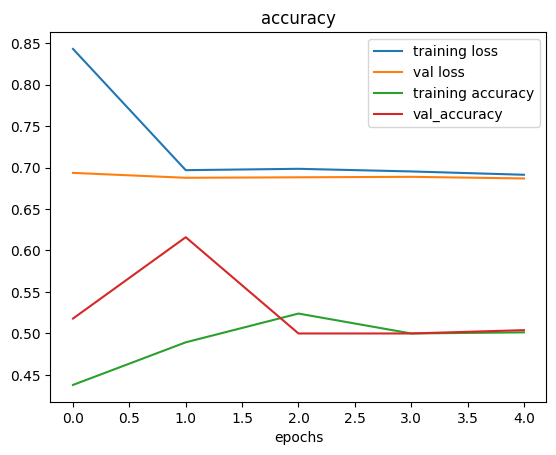

In [55]:
#check the model's training curves
plot_loss_curves(history_6)

To increase the randomness, lets turn on shuffle while creating augmented data

In [56]:
#Import data and augment it and shuffle from the training diretory
train_data_augmented_shuffled=train_datagen_augmented.flow_from_directory(train_dir,
                                                                          target_size=(224,224),
                                                                          class_mode="binary",
                                                                          batch_size=32,
                                                                          shuffle=True)#shuffle data this time

Found 1500 images belonging to 2 classes.


In [57]:
#create the model (same as model_5 and model_6)
model_7=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

#compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#fit the model
history_7=model_7.fit(train_data_augmented_shuffled, #fitting on augmented and shuffles data now
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented_shuffled),
                      validation_data=test_data,
                      validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 25s 503ms/step - loss: 0.6527 - accuracy: 0.6233 - val_loss: 0.5262 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 23s 500ms/step - loss: 0.5583 - accuracy: 0.7127 - val_loss: 0.4735 - val_accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 23s 500ms/step - loss: 0.5654 - accuracy: 0.7193 - val_loss: 0.3849 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 23s 490ms/step - loss: 0.5017 - accuracy: 0.7727 - val_loss: 0.3549 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 24s 507ms/step - loss: 0.4860 - accuracy: 0.7787 - val_loss: 0.4618 - val_accuracy: 0.7640


Epochs takes a little bit longer

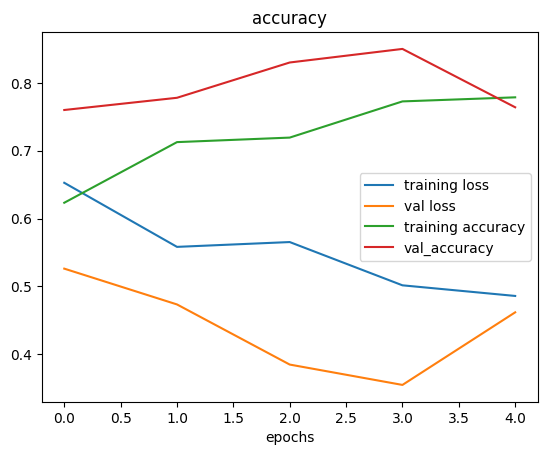

In [58]:
#plot the loss curves
plot_loss_curves(history_7)

If our model has to go to training data sequentially, without shuffling, it's going to have look at all pizza images at first. Learn the patterns in the pizza data, and then once its about halfway, once its been through the pizza data, it goes to images of steak, and figure out the patterns in steak. As it has already learnt the patterns of pizza, so it only has to adjust through steak. 

Whereas if we shuffle the images of pizza and steak, it goes through random images of pizza and steak throughout each epoch. So its learning the patterns simultaneously and it doesn't have to do a backflip on itself halfway through shuffling.

So if model is not performing well on training data, do shuffling, pre processing etc.

### Repeat until satisfied

Since the baseline is already beaten, there are few things to try to continue to improve our model

* Increase the no of model layers (e.g add more Conv2D/ Maxpool layer)
* Increase the no of filters in each convolutional layer (eg from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give model more opportunity to learn)
* Use **transfer learning** to leverage what either image model has learnt and adjust it for our own use case

>

## making a prediction with our trained model on our own custom data

In [59]:
#classes we're working with
print(class_names)

['pizza' 'steak']


--2023-04-17 11:14:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.008s  

2023-04-17 11:14:14 (228 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

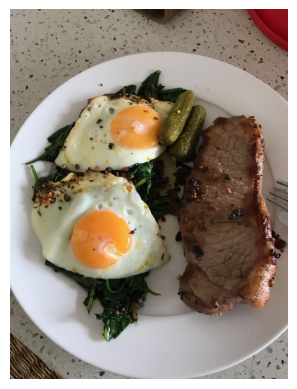

In [60]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#view the example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

steak=mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [61]:
#check the shape of the image
steak.shape #fairly high dimensions

(4032, 3024, 3)

In [62]:
steak #we cannot pass this image directly into the model as there is a shape issue
#the model is also expecting a batch size

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

In [63]:
tf.expand_dims(steak,axis=0).shape #now we have a tensor of 4 dims

TensorShape([1, 4032, 3024, 3])

In [64]:
expanded_steak=tf.expand_dims(steak,axis=0)

In [65]:
# model_7.predict(expanded_steak) -->again we need to reshape it

When we train a neural network, and we want to make prediction with it on the own custom data, its imp than your custom data(or new data) is preprocessed into the same format as the data your model was trained on

In [66]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [67]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak
     

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [68]:
pred=model_7.predict(tf.expand_dims(steak,axis=0)) 
pred

1/1 [==============================] - 0s 176ms/step


array([[0.95206827]], dtype=float32)

How likely this image falls into 1 category. In binary classification, prob>0.5 means the image belongs to class 1 (it is steak as class 0 is pizza) 

Looks like the custom image is being put through the model, however it currently outputs a prediction probability, 

In [69]:
#Reminding of the class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [70]:
#index the predicted class by rounding the prediction prob  and indexing it on the class names
pred_class=class_names[int(tf.round(pred))]
pred_class

'steak'

In [71]:
def pred_and_plot(model,filename,class_names=class_names):
  """
  imports an image located at filenames, makes a prediction with the model and plots the image with the predicted class as the title
  """

  #import the target image and preprocess it
  img=load_and_prep_image(filename)

  #make a prediction
  pred=model.predict(tf.expand_dims(img,axis=0))

  #get the predicted class
  pred_class=class_names[int(tf.round(pred))]

  #plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 22ms/step


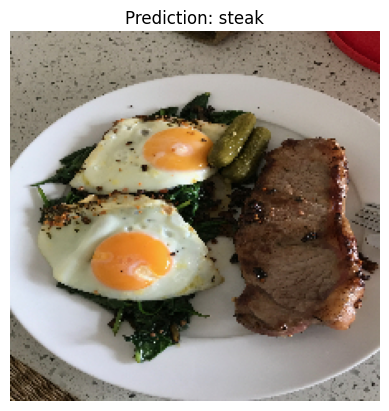

In [72]:
#test the model on a custom image
pred_and_plot(model_7,"03-steak.jpeg")

Trying on another image

--2023-04-17 11:14:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.009s  

2023-04-17 11:14:18 (322 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 20ms/step


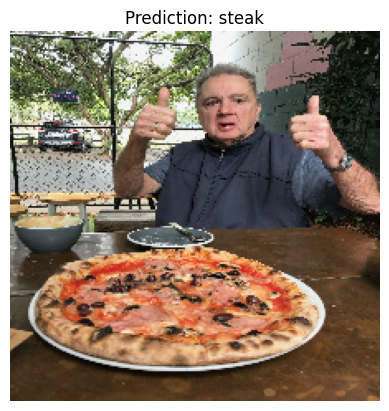

In [73]:
#download another test custom image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

pred_and_plot(model_7,"03-pizza-dad.jpeg")

#Multiclass image classifcation

1. Become one with the data
2. preprocess the data (get ready for a model)
3. Create the model
4. Fit the model
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## import and become one with the data

In [74]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#unzip the data
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-04-17 11:22:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  19.7MB/s    in 23s     

2023-04-17 11:22:38 (21.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [75]:
import os

#walkthrough the 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 

In [76]:
#setup the train and test directories
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [77]:
#get the class namse
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1404936.jpg']
Image shape: (512, 512, 3)


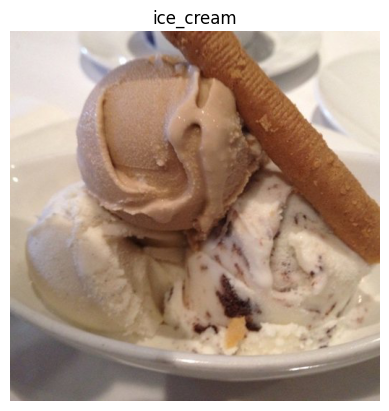

In [78]:
#visualise
import random
img=view_random_image(target_dir=train_dir,
                      target_class=random.choice(class_names))

In [79]:
random.choice(class_names)

'pizza'

###Preprocess the data

In [81]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Create the model



In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

#create the model
model_8=Sequential([
    Conv2D(10,3,input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax") #changed to sofmax to have 10 output neurons 
])

#compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [83]:
#fit the model 
history_8=model_8.fit(train_data, #now 10 diff classes
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data)) #int(0.25*len(test_data))--> if we want to take 25% of the test data

Epoch 1/5
235/235 [==============================] - 54s 218ms/step - loss: 2.1284 - accuracy: 0.2263 - val_loss: 1.9543 - val_accuracy: 0.2984
Epoch 2/5
235/235 [==============================] - 50s 213ms/step - loss: 1.8381 - accuracy: 0.3661 - val_loss: 1.8486 - val_accuracy: 0.3572
Epoch 3/5
235/235 [==============================] - 51s 217ms/step - loss: 1.4885 - accuracy: 0.5061 - val_loss: 1.8713 - val_accuracy: 0.3548
Epoch 4/5
235/235 [==============================] - 48s 206ms/step - loss: 0.8885 - accuracy: 0.7129 - val_loss: 2.3955 - val_accuracy: 0.2840
Epoch 5/5
235/235 [==============================] - 49s 207ms/step - loss: 0.3422 - accuracy: 0.8936 - val_loss: 3.4149 - val_accuracy: 0.2944


In [84]:
len(train_data)

235

This is randomly guessing and the model is taking longer to fit even though its running on GPU, its becs instead of working with 2 classes of data, we are working with 10 classes. So the GPU has to look at more data to find the patterns--> the more data we have, the more computing power we need

In [85]:
#evaluate the model
model_8.evaluate(test_data)

79/79 [==============================] - 12s 148ms/step - loss: 3.4149 - accuracy: 0.2944


[3.414933919906616, 0.29440000653266907]

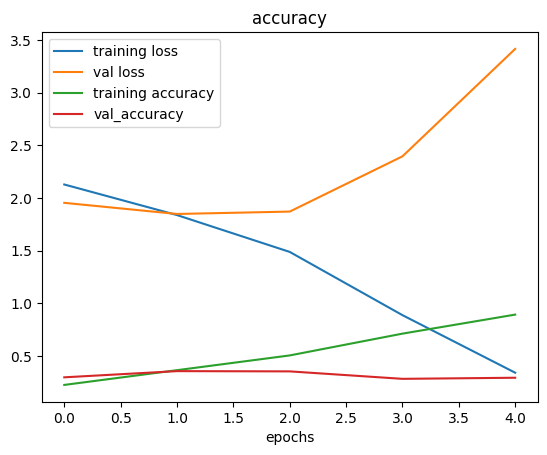

In [86]:
#check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

Ideally we want if the training loss gies down then the validation loss should also go down but this is not the case after epoch 1. So the model is **overfitting** and is not performing well on unseen data...

In [ ]:
#adjust the model parameters and reduce overfitting